# Problem Set #2-1
- MACS 30150, Dr. Evans 
- Name: Kento Yoshizawa (CNET: kyoshizawa) 
- Date: January 15, 2020

## Question 1 Numerical differentiation

In [1]:
import numpy as np
import sympy as sy
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

## Problem 1

In [2]:
# Symbolic differentiation
x  = sy.symbols('x')
f  = (sy.sin(x) + 1) ** sy.sin(sy.cos(x))
df = sy.diff(f,x)
df

(-log(sin(x) + 1)*sin(x)*cos(cos(x)) + sin(cos(x))*cos(x)/(sin(x) + 1))*(sin(x) + 1)**sin(cos(x))

In [3]:
# Lambdify the resulting functions
f_lambda  = sy.lambdify(x, f)
df_lambda = sy.lambdify(x, df)

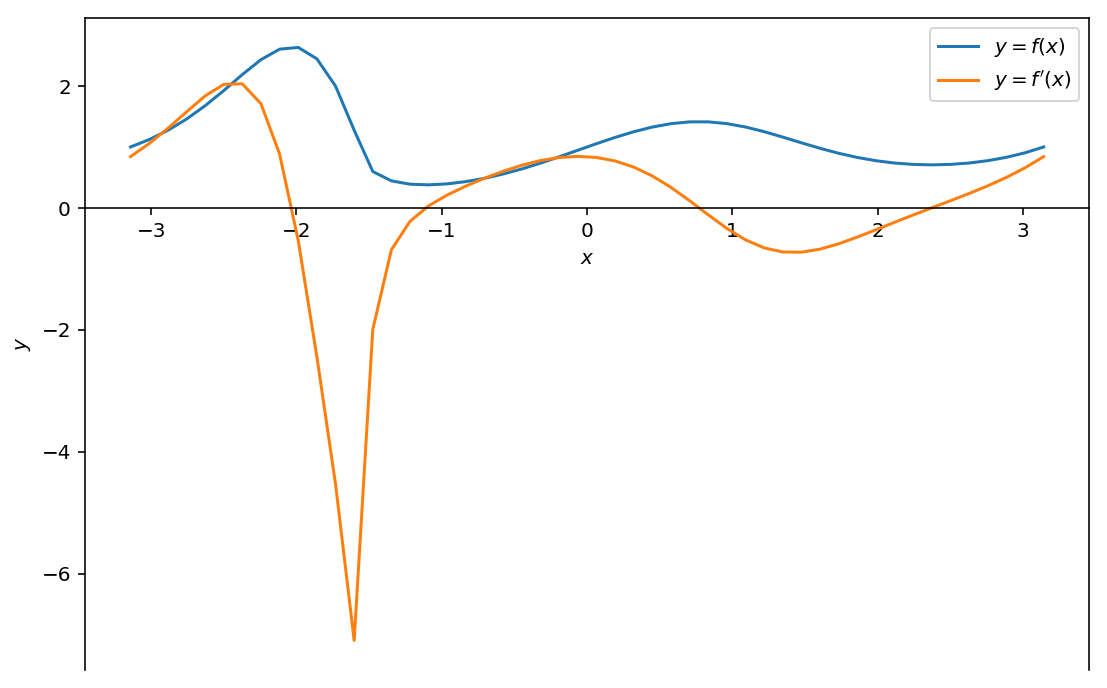

In [4]:
# Plot f and f'
x = np.linspace(-np.pi, np.pi)

fig, ax = plt.subplots(figsize = (9,6))
ax = plt.gca()
ax.spines['bottom'].set_position('zero')
ax.plot(x, f_lambda(x), label  = '$y = f(x)$')
ax.plot(x, df_lambda(x), label = "$y = f'(x)$")
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.legend()
plt.show();

## Problem 2

In [5]:
# Function for each of the common finite difference quotients
d1f_F = lambda fx, x, h: (fx(x + h) - fx(x))/h
d2f_F = lambda fx, x, h: (-3 * fx(x) + 4 * fx(x + h) - fx(x + 2*h))/(2 * h)
d1f_B = lambda fx, x, h: (fx(x) - fx(x - h))/h
d2f_B = lambda fx, x, h: (3 * fx(x) - 4 * fx(x - h) + fx(x - 2*h))/(2 * h)
d2f_C = lambda fx, x, h: (fx(x + h) - fx(x - h))/(2 * h)
d4f_C = lambda fx, x, h: (fx(x - 2 * h) - 8 * fx(x - h) + 8 * fx(x + h) - fx(x + 2 * h))/ (12 * h)

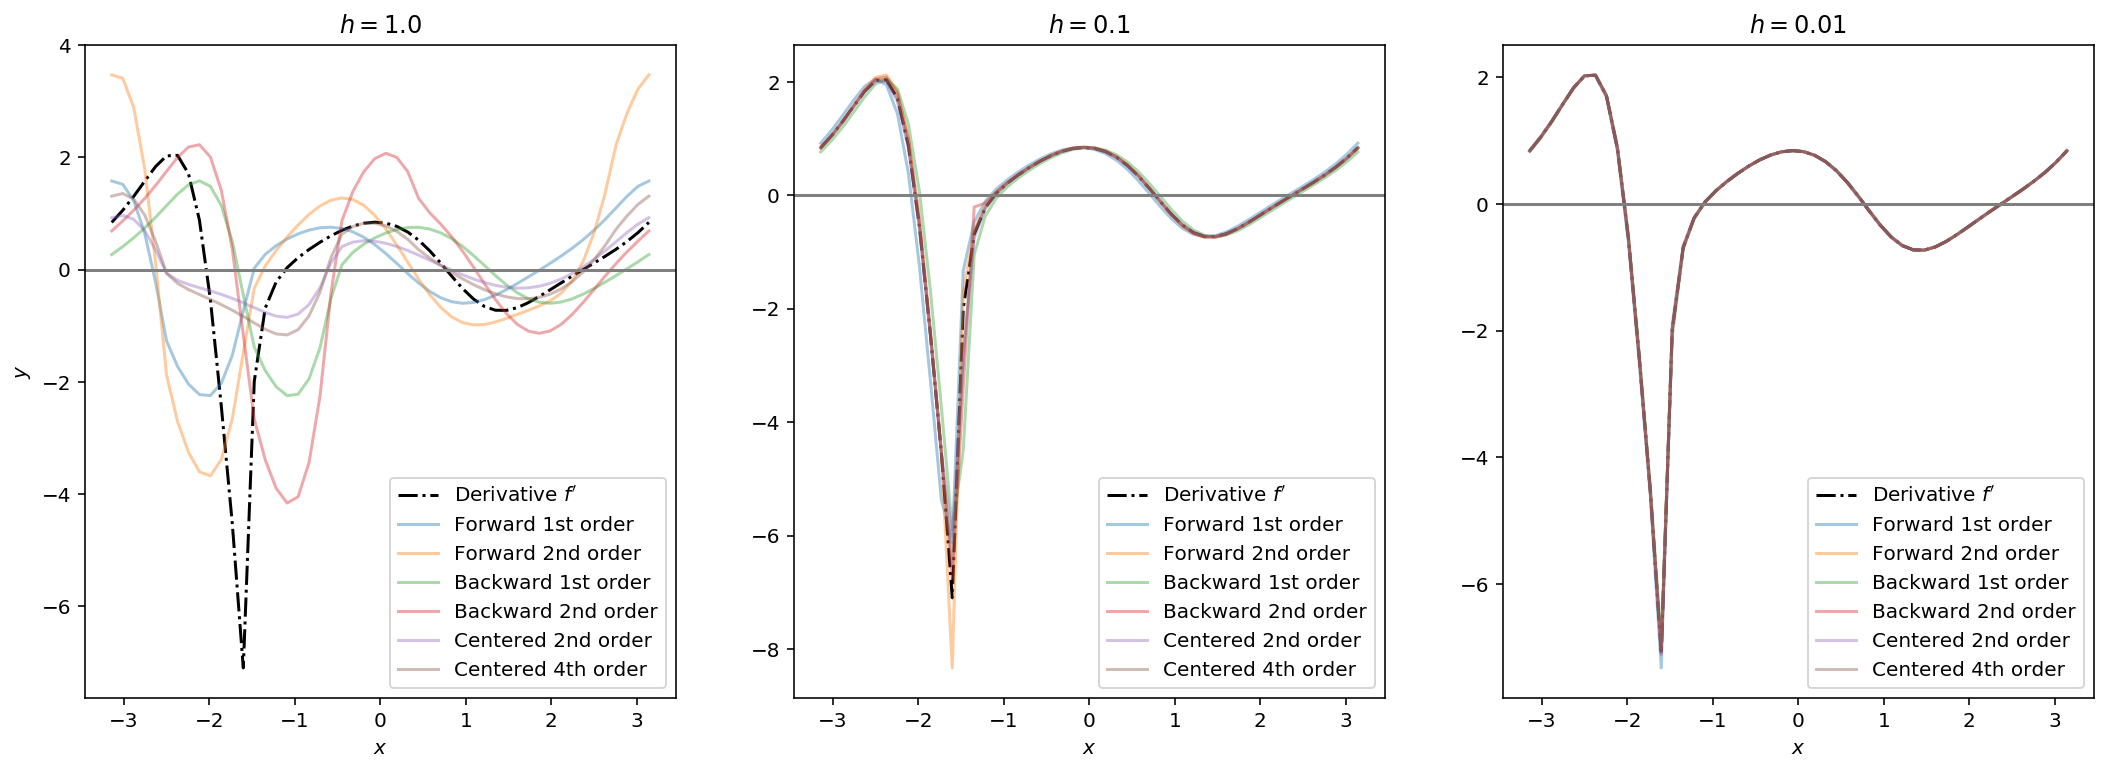

In [6]:
x = np.linspace(-np.pi, np.pi)
labels = ['Forward 1st order', 'Forward 2nd order', 'Backward 1st order', 'Backward 2nd order',
          'Centered 2nd order', 'Centered 4th order']
functions = [d1f_F, d2f_F, d1f_B, d2f_B, d2f_C, d4f_C]

fig, axes = plt.subplots(ncols = 3, figsize = (18,6))

axes[0].plot(x, df_lambda(x), ls = '-.', c = 'k',label = "Derivative $f'$")
for l, func in zip(labels, functions):
    axes[0].plot(x, func(f_lambda, x, h = 1), label = l, alpha = 0.4)
axes[0].set_xlabel('$x$')
axes[0].set_ylabel('$y$')
axes[0].set_title('$h = 1.0$')
axes[0].axhline(0, ls = "-", color = "grey")
axes[0].legend()

axes[1].plot(x, df_lambda(x), ls = '-.', c = 'k',label = "Derivative $f'$")
for l, func in zip(labels, functions):
    axes[1].plot(x, func(f_lambda, x, h = 0.1), label = l, alpha = 0.4)
axes[1].set_xlabel('$x$')
axes[1].set_title('$h = 0.1$')
axes[1].axhline(0, ls = "-", color = "grey")
axes[1].legend()

axes[2].plot(x, df_lambda(x), ls = '-.', c = 'k',label = "Derivative $f'$")
for l, func in zip(labels, functions):
    axes[2].plot(x, func(f_lambda, x, h = 0.01), label = l, alpha = 0.4)
axes[2].set_xlabel('$x$')
axes[2].set_title('$h = 0.01$')
axes[2].axhline(0, ls = "-", color = "grey")
axes[2].legend()

plt.show();

As $h$ gets smaller, every common finite difference quotients for approximating $f'(x)$ is converging on derivative $f'(x)$.

## Problem 3

In [7]:
def abs_err(x0, f, df, approx_df, h_logspace = 9):
    '''
    A function calculates absolute error of approximate derivative
    for given h in logarithmically spaced values.
    
    Input
    ------
    x0: float
     an arbitrary point at which to compute the derivative of function
    
    f:  function object
     a lambdified function
     
    df: function object
     a lambdified derivative function
     
    approx_df: function object
     an approximate derivative function
     
    h_logspace: int
     specify the size of logarithmically spaced values
    
    Returns
    -------
    space: array-like
     logarithmically spaced values
    errs: array-like
     absolute errors against h
    '''
    errs = []
    space = np.logspace(-(h_logspace-1), 0, h_logspace)
    for h in space:
        err = abs(df(x0) - approx_df(f, x0, h))
        errs.append(err)
    return space, errs

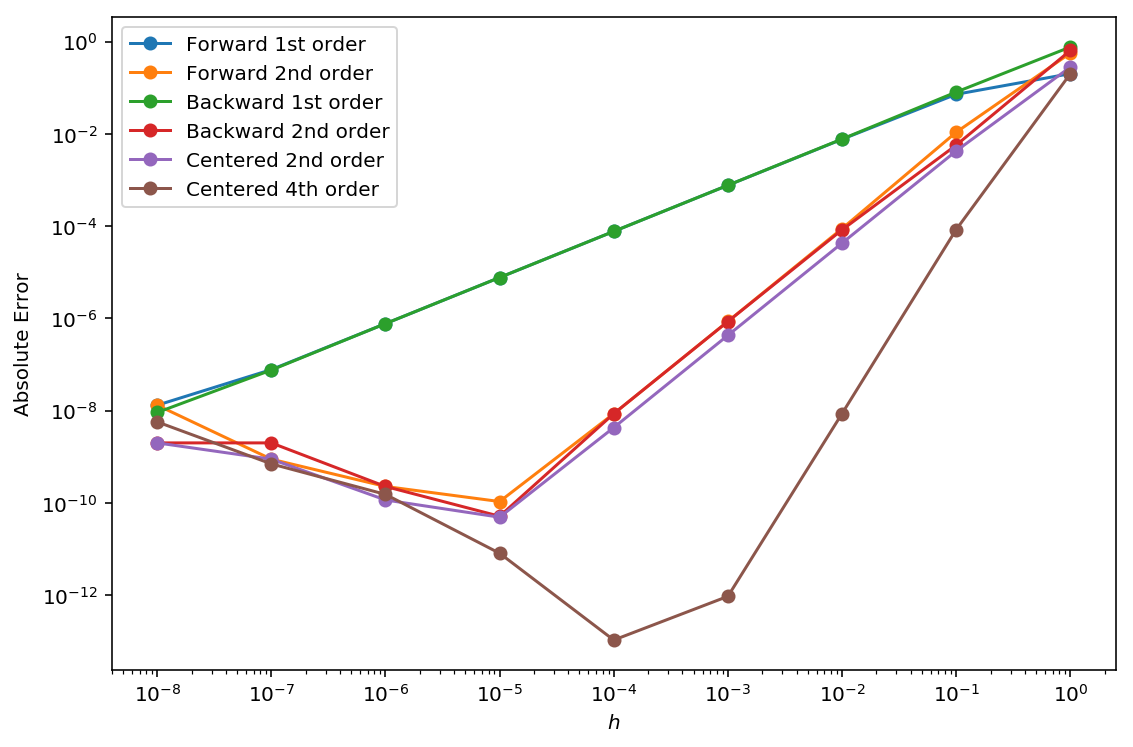

In [8]:
fig, ax = plt.subplots(figsize = (9,6))

for l, func in zip(labels, functions):
    space, errs = abs_err(x0 = 1.0, f = f_lambda, df = df_lambda, approx_df = func, h_logspace = 9)
    ax.plot(space, errs, 'o-', label = l)
ax.set_xlabel('$h$')
ax.set_ylabel('Absolute Error')
plt.legend()
plt.loglog()
plt.show();

## Problem 4

In [9]:
plane  = np.load('plane.npy')
plane

array([[ 7.  , 56.25, 67.54],
       [ 8.  , 55.53, 66.57],
       [ 9.  , 54.8 , 65.59],
       [10.  , 54.06, 64.59],
       [11.  , 53.34, 63.62],
       [12.  , 52.69, 62.74],
       [13.  , 51.94, 61.72],
       [14.  , 51.28, 60.82]])

In [10]:
r_alpha = np.deg2rad(plane[:,1])
r_beta  = np.deg2rad(plane[:,2])
xt = 500 * (np.tan(r_beta) / (np.tan(r_alpha) - np.tan(r_beta)))
yt = 500 * (np.tan(r_beta) * np.tan(r_alpha) / (np.tan(r_beta) - np.tan(r_alpha)))

In [11]:
def velocity(xt, yt, h = 1, start = 7):
    velo = []
    ind = np.arange(0, len(xt))
    # Forward
    dF_x = (xt[ind[0] + h] - xt[ind[0]]) / h
    dF_y = (yt[ind[0] + h] - yt[ind[0]]) / h
    velo_F = np.sqrt(dF_x ** 2 + dF_y ** 2)
    velo.append(velo_F)
    
    # Centered
    for t in ind[1:-1]:
        dC_x = (xt[t + h] - xt[t - h]) / (2 * h)
        dC_y = (yt[t + h] - yt[t - h]) / (2 * h)
        velo_C = np.sqrt(dC_x ** 2 + dC_y ** 2)
        velo.append(velo_C)
        
    # Backward
    dB_x = (xt[ind[-1]] - xt[ind[-1] - h]) / h
    dB_y = (yt[ind[-1]] - yt[ind[-1] - h]) / h
    velo_B = np.sqrt(dB_x ** 2 + dB_y ** 2)
    velo.append(velo_B)

    return np.hstack([(ind + start).reshape(-1,1), np.array(velo).reshape(-1,1)])

In [12]:
velocity(xt,yt)

array([[ 7.        , 46.42420062],
       [ 8.        , 47.00103938],
       [ 9.        , 48.99880514],
       [10.        , 50.09944163],
       [11.        , 48.29035084],
       [12.        , 51.56455905],
       [13.        , 53.92303355],
       [14.        , 51.51480057]])

## Problem 5

In [13]:
def jacob_mat(Funcs, X, h):
    results = []    
    I = np.identity(len(X))
    for f in Funcs:
        for m in range(len(X)):
            e = I[m]
            a = X + h * e
            b = X - h * e
            results.append((f(*a) - f(*b)) / (2 * h))
    return np.array(results).reshape(-1,len(X))

In [14]:
x, y = sy.symbols('x, y')
f1 = x ** 2
f2 = x ** 3 - y

In [15]:
# Using SymPy to obtain Jacobian matrix
mat1 = np.array([[sy.diff(f1, x).subs([(x, 4),(y, 7)]), sy.diff(f1, y).subs([(x, 4),(y, 7)])],
                 [sy.diff(f2, x).subs([(x, 4),(y, 7)]), sy.diff(f2, y).subs([(x, 4),(y, 7)])]])
print(mat1)

[[8 0]
 [48 -1]]


In [16]:
# Using my function to obtain Jacobian matrix
f1_lambda  = sy.lambdify((x,y), f1)
f2_lambda  = sy.lambdify((x,y), f2)
F = [f1_lambda, f2_lambda]

mat2 = jacob_mat(Funcs = F, X = [4, 7], h = 0.001)
print(mat2)

[[ 8.        0.      ]
 [48.000001 -1.      ]]


## Problem 7

In [17]:
import time
from autograd import numpy as anp
from autograd import grad

In [18]:
f_grad = lambda x: (anp.sin(x) + 1) ** anp.sin(anp.cos(x))

In [21]:
def performance_test(target_f, bench_f = df_lambda, symbol_f = f_lambda, h = 0.0001, trial = 200, Type = 0):
    np.random.seed(417)
    X = np.random.uniform(-np.pi, np.pi, trial)
    bench_mark = bench_f(X)
    
    time_error = []
    if Type == 0:
        for i, x0 in enumerate(X):
            s = time.perf_counter()
            x  = sy.symbols('x')
            r = sy.diff(target_f, x).subs(x, x0).evalf()
            t = time.perf_counter() - s
            time_error.append([t, 1e-18]) 
            
    elif Type == 1:
        for i, x0 in enumerate(X):
            s = time.perf_counter()
            r = target_f(symbol_f, x0, h)
            t = time.perf_counter() - s
            err = abs(bench_mark[i] - r)
            time_error.append([t, err])  
            
    elif Type == 2:
        for i, x0 in enumerate(X):
            s = time.perf_counter()
            r = target_f(symbol_f)
            r = r(x0)
            t = time.perf_counter() - s
            err = abs(bench_mark[i] - r)
            time_error.append([t, err])  
            
    return np.array(time_error)

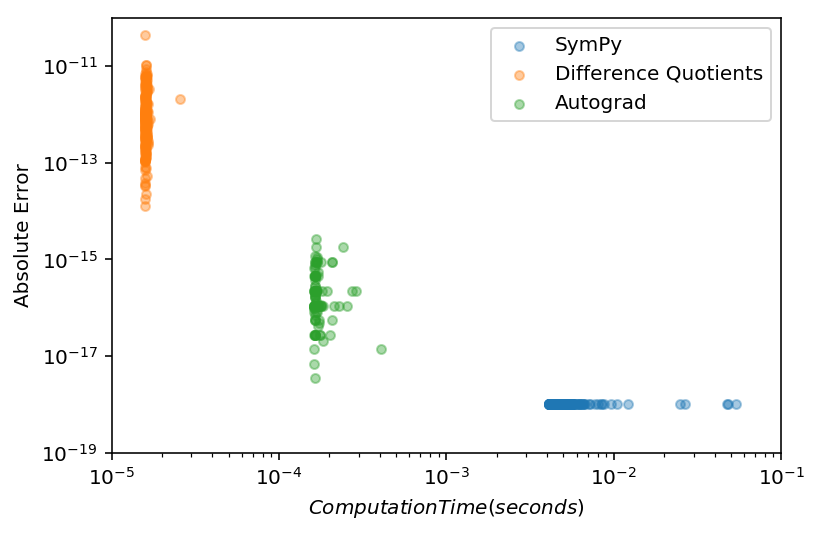

In [22]:
fig, ax = plt.subplots(figsize = (6,4))

r1 = performance_test(f, Type = 0)
r2 = performance_test(d4f_C, Type = 1)
r3 = performance_test(grad, symbol_f = f_grad, Type = 2)
ax.scatter(r1[:,0], r1[:,1], s=20, marker='o', alpha=0.4, label = 'SymPy')
ax.scatter(r2[:,0], r2[:,1], s=20, marker='o', alpha=0.4, label = 'Difference Quotients')
ax.scatter(r3[:,0], r3[:,1], s=20, marker='o', alpha=0.4, label = 'Autograd')
ax.set_xlabel('$Computation Time (seconds)$')
ax.set_ylabel('Absolute Error')
plt.legend()
plt.loglog()
plt.xlim(1e-5, 1e-1)
plt.ylim(1e-19, 1e-10)
plt.show();